# Notebook para valoração do uso da flexibilidade de hydroeletricas através da análise do custo de soluções alternativas

Globalmente, a política de implementação de fontes renováveis tem se concentrado principalmente na expansão da capacidade instalada, enquanto questões operacionais, como a necessidade de flexibilidade para manter a estabilidade do sistema, bem como regulamentações e procedimentos de rede atualizados para aprimorar o controle do sistema de energia, foram frequentemente negligenciados. No entanto, atualmente, um número crescente de países está voltando sua atenção para as consequências dos altos níveis de participação de fontes de energia não convencionais no funcionamento adequado do sistema elétrico e nos mecanismos de integração dessas fontes à rede.

As usinas hidrelétricas são muito eficientes em fornecer serviços ancilares à rede elétrica, graças a sua flexibilidade. Especificamente, elas desempenham um papel crucial no controle de potência ativa e da frequência. Além disso, as usinas hidrelétricas com reservatório têm a capacidade de oferecer uma ampla gama de serviços energéticos, como geração de energia de base e de pico, bem como armazenamento de energia. Além disso, essas usinas podem desempenhar um papel importante na regulação de outras fontes de energia, com custos variáveis muito baixos.

Neste contexto de crescente uso de fontes de energia não despachável, cada vez mais as usinas hidrelétricas vão ser demandadas a fornecer serviços ancilares e de flexibilidade. É de fundamental importância a valoração destes serviços de maneira a incentivar o desenvolvimento de capacidade para os mesmos aumentando a eficiência do uso dos recursos hídricos. Desta maneira o presente trabalho visa contribuir para estimar o valor de tal serviço à sociedade através do cálculo do custo de soluções alternativas seguindo o conceito de BATNA (do inglês: Best Alternative To a Negotiated Agreement)  introduzido no método de negociação de Havard.

Este notebook foi feito visando a valoração do custo da flexibilidade energética de um país de consumo equivalente ao Brasil. Para isso, foram determinados dois cenárioas alternativos para suprir a flexibilidade requerida pela demanda brasileira. Imagina-se, primeiramente, um cenário com turbinas à gás, e um cenário com turbinas à gás em conjunto com baterias. Vale lembrar que para estas turbinas, foi verificado o Custo Capital e os Custos de Operação e Manutenção; e que estes são divididos em fixos e variáveis.

Com base nesses custos e com um uma estimativa do valor de MWH usados para suprir a flexibilidade vamos alcançar um o custo, em US$/MWH flexível, associado a prover a flexibilidade sem o uso de plantas hidroelétricas, e com base no método BATNA, alcançamos o valor da flexibilidade.

Para facilitar a utilização do especialista, o notebook está dividido em seções.

#Seção de caracterização do notebook

**Texto originado no artigo.**

    Equação do artigo

*Comentário sobre o código*

In [3]:
#Comentário no código
Codigo=str()
print("Output do programa")

Output do programa


# Seção 1 - Coleta de dados

*Nessa  parte será feita a instalação das biblioteca necessaria para o calculo da amortização onde é utilizado o método PRICE.*

In [4]:
%pip install amortization #para essa biblioteca foi necessaria a instalação antes desta ser importada.


Note: you may need to restart the kernel to use updated packages.


*Nesta parte, seleciona-se entre as bibliotecas instaladas que serão utilizadas neste código para leitura de dados, calculos matemáticos, calculos de amortização e para analise estatística.*

In [5]:
import pandas as pd               # é uma biblioteca para analise de dados.

import openpyxl                   # é uma biblioteca Python para ler/gravar arquivos xlsx/xlsm/xltx/xltm do Excel 2010.

from pathlib import Path          # é uma biblioteca Python para lidar com arquivos e caminhos em seu sistema operacional.

import numpy as np                # é uma biblioteca que permite manipular grande quantidade de dados multidimensionais

import matplotlib.pyplot as plt   # é uma biblioteca que permite criação de gráficos

import math as m                  # é uma biblioteca que amplia as funções matematicas disponiveis

# from google.colab import files    # é a biblioteca que permite importar arquivos para o google colab

import sys                        # é uma biblioteca que permite acesso a algumas variaveis do sistema

from amortization.schedule import amortization_schedule # é uma biblioteca para calcular amortização

from scipy.stats import norm      # importa variável aleatória de distribuição normal e contínua.

import statistics                 # é uma biblioteca para análises estatísticas em Python.

import plotly.graph_objects as go # Biblioteca para criar gráficos interativos

import os

## Funções auxiliares

Funções com o objetivo de promover a reutilização de código utilizado na visualização de gráficos do notebook.

In [6]:
from IPython.display import display
from ipywidgets import Button

def grafico_interativo_linha(x, y, nome_eixo_x, nome_eixo_y, titulo="", nome_legenda="", exportar_pdf=None):
    """
    Função que cria um gráfico interativo de linha e permite exportá-lo como PDF.
    :param x: Vetor com os valores do eixo x.
    :param y: Vetor com os valores do eixo y.
    :param nome_eixo_x: String que aparecerá abaixo do eixo x do gráfico.
    :param nome_eixo_y: String que aparecerá abaixo do eixo y do gráfico.
    :param titulo: Título do gráfico (Opcional).
    :param nome_legenda: Nome da legenda (Opcional).
    :param exportar_pdf: Caminho do arquivo PDF para exportar (Opcional).
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=nome_legenda))

    fig.update_layout(
        title=titulo,
        xaxis_title=nome_eixo_x,
        yaxis_title=nome_eixo_y,
        legend_title="Legenda"
    )

    fig.show(config={'displaylogo': False})

    if exportar_pdf:
        if not os.path.splitext(exportar_pdf)[1]:
            exportar_pdf += ".pdf"
        fig.write_image(exportar_pdf)

    return fig

def grafico_interativo_multiplas_linhas(x, y, nome_eixo_x, nome_eixo_y, titulo="", nome_legenda=[], exportar_pdf=None):
    """
    Função que cria um gráfico interativo com múltiplas linhas aninhadas e permite exportá-lo como PDF.
    :param x: Vetor com os valores do eixo x.
    :param y: Matriz contendo os valores de cada linha a ser plotada. Exemplo: [[1, 2, 3], [4, 5, 6]].
    :param nome_eixo_x: String que aparecerá abaixo do eixo x do gráfico.
    :param nome_eixo_y: String que aparecerá abaixo do eixo y do gráfico.
    :param titulo: Título do gráfico (Opcional).
    :param nome_legenda: Lista com os nomes das legendas para cada linha (Opcional).
    :param exportar_pdf: Caminho do arquivo PDF para exportar (Opcional).
    """
    fig = go.Figure()
    for i in range(len(y)):
        legenda = nome_legenda[i] if i < len(nome_legenda) else ""
        fig.add_trace(go.Scatter(x=x, y=y[i], mode='lines', name=legenda))

    fig.update_layout(
        title=titulo,
        xaxis_title=nome_eixo_x,
        yaxis_title=nome_eixo_y,
        legend_title=""
    )

    fig.show(config={'displaylogo': False})

    if exportar_pdf:
        if not os.path.splitext(exportar_pdf)[1]:
            exportar_pdf += ".pdf"
        fig.write_image(exportar_pdf)

# Função para exportar o gráfico como um PDF
def exportar_para_pdf(fig, nome="grafico.pdf"):
    if not os.path.exists("imagens"):
        os.mkdir("imagens")
    fig.write_image(f"imagens/{nome}")




*Aqui são feitos uploads de arquivos excel da ONS com os dados da demanda horária no ano de 2022 (ano escolhido).*

In [7]:
# uploaded = files.upload() #Passo necessario por ser utilizado o google colab

*O trecho de código a seguir apresenta a definição da variável que lerá o arquivo excel apresentado previamente.*

In [8]:
df = pd.read_excel('CURVA_CARGA_2022.xlsx'); #Nome do arquivo tem que ser mudado se for usar dados de outro ano
df.dropna(inplace = True)
# print(np.sum(df.iloc[:,3]))

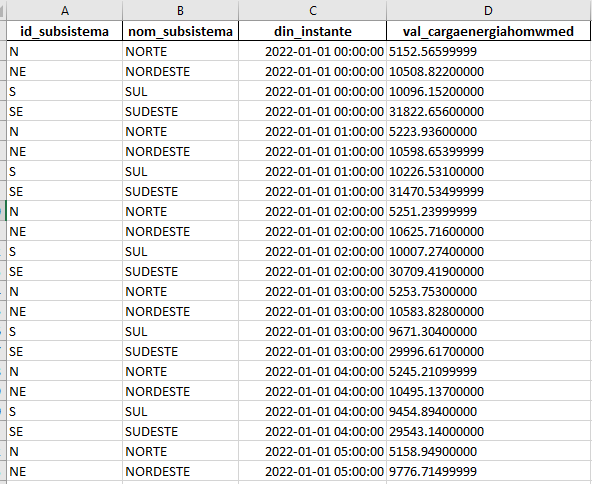

*Estrutura da tabela gerada pela ONS*

*Aqui os dados dos consumos de energia horário de cada região do Brasil (Norte - N; Nordeste - NE; Sul - S; Sudeste - SE) são adquiridos.*

In [9]:
flag = 1
Energia_horaria = [0] * len(df)
Energia_horaria_N = [0] * len(df)
Energia_horaria_NE = [0] * len(df)
Energia_horaria_S = [0] * len(df)
Energia_horaria_SE = [0] * len(df)
Tempo = [0] * len(df)

# Organização da informação colhida no arquivo Excel.
for i in range(len(df)):
  if df.iloc[i, 0] == "N":
    Energia_horaria_N[i] = df.iloc[i, 3]
    Tempo[i] = df.iloc[i, 2]
  if df.iloc[i, 0] == "NE":
    Energia_horaria_NE[i] = df.iloc[i, 3]
  if df.iloc[i, 0] == "S":
    Energia_horaria_S[i] = df.iloc[i, 3]
  if df.iloc[i, 0] == "SE":
    Energia_horaria_SE[i] = df.iloc[i, 3]


In [10]:
def criar_serie_temporal(dados, inicio, passo=4):
    """
    Função para criar uma série temporal reduzida.
    :param dados: lista ou série original de dados.
    :param inicio: índice inicial para começar a seleção.
    :param passo: passo para seleção dos elementos. Padrão é 4.
    :return: pd.Series com elementos selecionados.
    """
    selecionados = []
    for i in range(passo - inicio, len(dados), passo):
        selecionados.append(dados[i])

    return pd.Series(selecionados)

# Define o vetor de tempo para o "eixo x" do gráfico.
tempo_temp = criar_serie_temporal(Tempo, inicio=0)
# Coleta os dados dos consumos de energia da região Norte.
energia_horaria_n_temp = criar_serie_temporal(Energia_horaria_N, inicio=0)
# Coleta os dados dos consumos de energia da região Nordeste.
energia_horaria_ne_temp = criar_serie_temporal(Energia_horaria_NE, inicio=3)
# Coleta os dados dos consumos de energia da região Sul.
energia_horaria_s_temp = criar_serie_temporal(Energia_horaria_S, inicio=2)
# Coleta os dados dos consumos de energia da região Sudeste.
energia_horaria_se_temp = criar_serie_temporal(Energia_horaria_SE, inicio=1)

# Soma todas as energias e traça a média do consumo de energia anual.
if flag == 1:
    flag = 0
    Energia_horaria_N = energia_horaria_n_temp
    Energia_horaria_NE = energia_horaria_ne_temp
    Energia_horaria_S = energia_horaria_s_temp
    Energia_horaria_SE = energia_horaria_se_temp
    Energia_horaria = Energia_horaria_N + Energia_horaria_NE + Energia_horaria_S + Energia_horaria_SE
    Tempo = tempo_temp
    Energia_horaria.iloc[-1] = np.mean(Energia_horaria)

# Figura do gráfico "Consumo de energia x hora" em 1 ano.
fig = grafico_interativo_linha(tempo_temp, Energia_horaria, "Tempo[dias]", "Demanda[MWmedio]", "Consumo de energia x hora")

# Função de wrapper para o clique do botão
def ao_clicar_no_botao(b):
    exportar_para_pdf(fig)
    try:
        pass
      # files.download('imagens/grafico.pdf')
    except:
      print("Não foi possível baixar o arquivo")

print("Figura 1 - Demanda sem média móvel [MWmedio]")

# Criar e exibir o botão
botao = Button(description="Exportar para PDF")
botao.on_click(ao_clicar_no_botao)
display(botao)

print("OBS.: Para baixar arquivos é necessário desativar ADBlockers na página.")



Figura 1 - Demanda sem média móvel [MWmedio]


Button(description='Exportar para PDF', style=ButtonStyle())

OBS.: Para baixar arquivos é necessário desativar ADBlockers na página.


*Primeiro gráfico da demanda horária de energia no Brasil.*

In [11]:
Energia_horaria=Energia_horaria[0:(len(Energia_horaria)-1)]

print("Média anual de consumo:", np.mean( Energia_horaria),"MW")

Média anual de consumo: 68786.01176594406 MW


In [12]:
# Média móvel da demanda anual em 7 dias
media_movel_sete_dias = []
numero_dias = 7 * 24  # sete dias, 24 horas cada
i = 0

while i < len(Energia_horaria) - numero_dias + 1:
    # Armazenando elementos da janela atual
    janela = Energia_horaria[i : i + numero_dias]

    # Calculando a média da janela
    media_janela = sum(janela) / numero_dias

    # Armazenando a média na lista de média móvel
    media_movel_sete_dias.append(media_janela)

    # Deslocando a janela para a direita em uma posição
    i += 1

# Chamada para função de gráfico interativo com múltiplas linhas
grafico_interativo_multiplas_linhas(
    list(range(365 * 24 - 1)),
    [Energia_horaria[0 : 365 * 24], media_movel_sete_dias[0 : 365 * 24 - numero_dias]],
    "Tempo [horas no ano]",
    "Demanda [MW médio]",
    "Variação da Demanda Energética em um Ano e sua Média Móvel de 7 Dias",
    ["Demanda Horária", "Média Móvel de 7 Dias"]
)



In [13]:
amplitude_anual = []
# O loop percorre a série 'Energia_horaria' em incrementos de uma semana (168 horas)
for i in range(0, len(Energia_horaria), 168):
    semana = []

    # Adiciona os dados de energia de cada dia da semana à lista 'semana'
    for dia in range(7):
        semana.append(Energia_horaria[dia + i])

    # Calcula a média da semana e adiciona à lista 'amplitude_anual'
    amplitude_anual.append(np.mean(semana))

# Chamada para função de gráfico interativo de linha
# TODO Substitir os argumentos vazios ("") por títulos e legendas
grafico_interativo_linha(list(range(len(amplitude_anual))), amplitude_anual, "", "")



# Seção 2 - Caso 1

 **O primeiro caso teve como foco encontrar a diferença entre o consumo máximo e a média de consumo anual. Assim, foi necessário achar o valor da potência instalada mínima para garantir o abastecimento de energia a todo momento, ou seja, o MW flexível.**

**Para isso, seguem as equações abaixo apresentando os cálculos realizados:**


---
    Consumo máximo = maior valor de consumo alcançado pela rede.
    Média de consumo = média dos valores de consumo horário no ano escolhido previamente.
    MW flexível = valor de potência instalada não utilizada durante a maior parte do tempo. Pode ser definido como o valor máximo menos o valor mínimo de energia consumida.


$$
\text{consumo máximo} - \text{média de consumo} = \text{MW flexível}
$$

*Nesta parte calcula-se a média de consumo energético em um ano, verifica-se também o consumo máximo e o mínimo de consumo de energia no ano (considerando o intervalo de 1 hora).*

In [14]:
# Cálculo 1
media_ano = np.average(Energia_horaria)  # Média anual em MW
max_ano = np.max(Energia_horaria)        # Valor máximo anual em MW
min_ano = np.min(Energia_horaria)        # Valor mínimo anual em MW

# Calculando a diferença entre o máximo e a média anual
energia_necessaria = max_ano - media_ano

# Exibindo os resultados
print(f"Média do ano: {media_ano} MW.")
print(f"Máximo do ano: {max_ano} MW.")
print(f"Mínimo do ano: {min_ano} MW.")
print(f"Quantidade de MW instalados, mas não utilizados em média (MW flexível): {energia_necessaria} MW.")

# Armazenando o resultado para comparação
comparar_caso1 = energia_necessaria


Média do ano: 68786.01176594406 MW.
Máximo do ano: 88643.91899998 MW.
Mínimo do ano: 47219.57899999 MW.
Quantidade de MW instalados, mas não utilizados em média (MW flexível): 19857.90723403594 MW.


*Baseado em dados fornecidos por artigos, foram definidos alguns valores de geração de energia em cada turbina termelétrica (CCGT e LFGT com 450; AeroGT com 53; SteamGT com 300) em MW. A partir dessas constantes, foi calculado o número de turbinas necessárias e quantas ficariam paradas por pelo menos um instante de tempo. Por fim, é calulado o valor da energia em $/MW.*

**Com base nesse valor e com o custo de capital associado a termelétricas,  é possível estimar o custo de capital associado à construção das termelétricas necessárias para atender a diferença entre o pico de consumo e o seu valor médio.**   

    Custo = custo por MW associado a construção de uma termoelétrica.
    MW flexível = valor médio de potência instalada não sendo utilizada.
    Custo capital = custo associado à construção da potência instalada necessária para suprir a flexibilidade.

$$
\text{custo} \times \text{MW flexível} = \text{custo capital}
$$


In [15]:
# ---- CCGT (Ciclo Combinado de Gás e Turbina a Vapor) ----
potencia_termo_CCGT = 430  # MW
# Cálculo do número necessário e custo de instalação de Usinas CCGT
termoeletricas_total_CCGT = np.ceil(max_ano / potencia_termo_CCGT)  # Total necessário
total_net_CCGT = 1084  # $/kW (Anteriormente foi utilizado 815 $/kW)
n_paradas_CCGT = np.ceil(energia_necessaria / potencia_termo_CCGT)  # Usinas paradas
valor_Instalacao_CCGT = n_paradas_CCGT * total_net_CCGT * 1000 * potencia_termo_CCGT  # Custo total

# ---- AeroGT ----
# Escolha do modelo e potência
# Fonte: https://www.sciencedirect.com/science/article/pii/S0360544214008512
# Modelo GE LM6000: https://www.ge.com/gas-power/products/gas-turbines/lm6000
AeroGT_power = 53.9 * 2  # Potência de uma turbina AeroGT (53 MW) multiplicada por 2
# Cálculo do número necessário e custo de instalação de Usinas AeroGT
Total_capital_one_Aero = 123453000  # $, fonte: EIA (https://www.eia.gov/analysis/studies/powerplants/capitalcost/pdf/capital_cost_AEO2020.pdf)
total_net_Aero = 1175  # $/kW
n_waiting_Aero = np.ceil(energia_necessaria / AeroGT_power)
Install_cost_Aero = n_waiting_Aero * Total_capital_one_Aero
verify_1 = n_waiting_Aero * total_net_Aero * 1000 * AeroGT_power  # Verificação do cálculo

# ---- Heavy Duty Gas Turbine GE 7F.05 ----
# Fonte: https://www.ge.comdam/gepower-new/global/en_US/downloads/gas-new-site/products/gas-turbines/7f-fact-sheet-product-specifications.pdf
Heavy_Duty_GE_7F_05_Power = 239  # MW
# Cálculo do número necessário e custo de instalação de Heavy duty GT
Total_capital_Heavy_Duty_GE_7F_05 = 165790000  # $, fonte: EIA (https://www.eia.gov/analysis/studies/powerplants/capitalcost/pdf/capital_cost_AEO2020.pdf)
total_net_Heavy_Duty_GE_7F_05 = 713  # $/kW
total_number_Heavy_Duty_GE_7F_05 = np.ceil(max_ano / Heavy_Duty_GE_7F_05_Power)
n_waiting_Heavy_Duty_GE_7F_05 = np.ceil(energia_necessaria / Heavy_Duty_GE_7F_05_Power)
Install_cost_Heavy_Duty_GE_7F_05 = n_waiting_Heavy_Duty_GE_7F_05 * Total_capital_Heavy_Duty_GE_7F_05
verify_2 = n_waiting_Heavy_Duty_GE_7F_05 * total_net_Heavy_Duty_GE_7F_05 * 1000 * Heavy_Duty_GE_7F_05_Power

# ---- Impressão dos Resultados ----
print("Valor 1 CCGT: ", ((valor_Instalacao_CCGT / n_paradas_CCGT) / 1000) / 1000, "milhões de USD\n")
print("Número de CCGT paradas, em média: ", n_paradas_CCGT, " \nCusto capital em bi$: ", round(((valor_Instalacao_CCGT / 1000) / 1000) / 1000, 3), "\n")
print("Número de Aero GT paradas, em média: ", n_waiting_Aero, " \nCusto capital em bi$: ", round(((Install_cost_Aero / 1000) / 1000) / 1000, 3), " \nOu calculado também como: ", round(((verify_1 / 1000) / 1000) / 1000, 3), "\n")
print("Número de Heavy Duty paradas, em média: ", n_waiting_Heavy_Duty_GE_7F_05, " \nCusto capital em bi$: ", round(((Install_cost_Heavy_Duty_GE_7F_05 / 1000) / 1000) / 1000, 3), " \nOu calculado também como: ", round(((verify_2 / 1000) / 1000) / 1000, 3))


Valor 1 CCGT:  466.12 milhões de USD

Número de CCGT paradas, em média:  47.0  
Custo capital em bi$:  21.908 

Número de Aero GT paradas, em média:  185.0  
Custo capital em bi$:  22.839  
Ou calculado também como:  23.433 

Número de Heavy Duty paradas, em média:  84.0  
Custo capital em bi$:  13.926  
Ou calculado também como:  14.314


Nesta etapa, é calculado o valor mensal de uma turbina termelétrica parada considerando a sua potência também (tem que mudar os valores para CADA TURBINA QUE ESTÁ SENDO ANALISADA(em curso)).

**Os dois cenários possuem maquinários com tempo de vida útil diferentes, para fazer a comparação dos investimentos se considerou o custo total dos dois cenários e aplicou o custo do capital necessário a tabela PRICE para alcançar o custo mensal equivalente [6].**

$$
    \frac{ \text{custo capital}  \times  \text{taxa de juros}}{( 1 - (1 + \text{taxa juros})^{(\text{-num parcelas})})} 
$$

**Para que nos dois casos, o custo de aquisição dos equipamentos estejam no mesmo patamar, tornando uma comparação mais justa e realista.**


In [16]:
# Calculo 3

# OM Custo mensal para uma CCGT

# Dados coletados em https://www.eia.gov/analysis/studies/powerplants/capitalcost/pdf/capital_cost_AEO2020.pdf
custo_termo_CCGT = 14.1*1000 #US$/MW por ano
custo_anual_CCGT_paradas = n_paradas_CCGT * potencia_termo_CCGT * custo_termo_CCGT
print("O custo de O&M mensal para uma CCGT termelétrica parada é: ", round(((custo_anual_CCGT_paradas/12)/1000)/1000, 3), "milhões de USD. \n")


# OM Custo mensal para uma AeroGT
OM_cost_Aero_waiting = 16.3*1000 #US$/MW por ano
Anal_OM_cost_Aero = n_waiting_Aero * AeroGT_power * OM_cost_Aero_waiting # Custo OM durante o ano para a Aero GT.
print("O custo de O&M mensal para uma AeroGT termelétrica parada é: ", round(((Anal_OM_cost_Aero/12)/1000)/1000, 3), "milhões de USD. \n")

# OM Custo mensal para uma Heavy duty gas turbine GE 7F.05
OM_cost_Heavy_Duty_GE_7F_05_waiting = 7*1000 #US$/MW por ano
Anal_OM_cost_Heavy_Duty_GE_7F_05 = n_waiting_Heavy_Duty_GE_7F_05 * Heavy_Duty_GE_7F_05_Power * OM_cost_Heavy_Duty_GE_7F_05_waiting # Custo OM durante o ano para a Heavy Duty GT.
print("O custo de O&M mensal para uma Heavy Duty termelétrica parada é: ", round(((Anal_OM_cost_Heavy_Duty_GE_7F_05/12)/1000)/1000, 3), "milhões de USD. \n")

O custo de O&M mensal para uma CCGT termelétrica parada é:  23.747 milhões de USD. 

O custo de O&M mensal para uma AeroGT termelétrica parada é:  27.089 milhões de USD. 

O custo de O&M mensal para uma Heavy Duty termelétrica parada é:  11.711 milhões de USD. 



*Pode-se realizar também o custo de operação de uma turbina termelétrica.*

*Nesta fase, procede-se ao cálculo da quota mensal de instalação por meio da aplicação do cálculo de amortização.*

In [17]:
# Calculo da amortizacao 4
# https://pypi.org/project/amortization/
# for number, amount, interest, principal, balance in amortization_schedule(150000, 0.1, 36):
    # print(number, amount, interest, principal, balance)


# CCGT 20 anos com o valor de instalação da Heavy Duty com juros de 5% ao ano
for number, amount, interest, principal, balance in amortization_schedule(valor_Instalacao_CCGT, 0.05, 12*20):
    a=2

CCGT_amount = amount


# AeroGT 20 anos com o valor de instalação da Heavy Duty com juros de 5% ao ano
for number, amount, interest, principal, balance in amortization_schedule(Install_cost_Aero, 0.05, 12*20):
    a=2

Aero_amount = amount


# Heavy Duty 20 anos com o valor de instalação da Heavy Duty com juros de 5% ao ano
for number, amount, interest, principal, balance in amortization_schedule(Install_cost_Heavy_Duty_GE_7F_05, 0.05, 12*20):
    a=2

Heavy_Duty_GE_7F_05_amount = amount

print("Valor da parcela mensal para o custo capital de todas as CCGTs", round(((CCGT_amount/1000)/1000), 3), "milhões de USD ou", round(CCGT_amount/(media_ano*30*24), 2) ,"em $/MWh \n")
print("Valor da parcela mensal para o custo capital de todas as Aero GT", round(((Aero_amount/1000)/1000), 3), "milhões de USD ou", round(Aero_amount/(media_ano*30*24), 2) ,"em $/MWh \n")
print("Valor da parcela mensal para o custo capital de todas as Heavy Duty GT", round(((Heavy_Duty_GE_7F_05_amount/1000)/1000), 3), "milhões de USD ou", round(Heavy_Duty_GE_7F_05_amount/(media_ano*30*24), 2) ,"em $/MWh \n")

Valor da parcela mensal para o custo capital de todas as CCGTs 144.581 milhões de USD ou 2.92 em $/MWh 

Valor da parcela mensal para o custo capital de todas as Aero GT 150.726 milhões de USD ou 3.04 em $/MWh 

Valor da parcela mensal para o custo capital de todas as Heavy Duty GT 91.908 milhões de USD ou 1.86 em $/MWh 



**Os dois cenários possuem maquinários com tempo de vida útil diferentes, para fazer a comparação dos investimentos se considerou o custo total dos dois cenários e aplicou o custo do capital necessário a tabela PRICE para alcançar o custo mensal equivalente.**

$$
    \frac{ \text{custo capital}  \times  \text{taxa de juros}}{( 1 - (1 + \text{taxa juros})^{(\text{-num parcelas})})} 
$$

**Para que nos dois casos, o custo de aquisição dos equipamentos estejam no mesmo patamar, tornando uma comparação mais justa e realista.**

*Por fim, calcula-se o custo mensal total por meio da adição do custo de instalação ao custo mensal de manutenção, enquanto o custo de flexibilidade foi determinado ao dividirmos o custo mensal pelo valor médio mensal de energia.*

In [18]:
# Calculo final da parcela mensal total para CCGT
print("Custo de manutenção para CCGT (em milhões de USD): ", round(((custo_anual_CCGT_paradas/12)/1000)/1000, 3), "\n ou o valor de", round((custo_anual_CCGT_paradas/12)/(media_ano*30*24), 2) ,"$/MWh \n")
custo_total_caso_1 = CCGT_amount + custo_anual_CCGT_paradas/12
print("Custo total mensal para CCGT (em milhões de USD)", round(((custo_total_caso_1)/1000)/1000, 2))
preco_dollarMW_c1 = custo_total_caso_1/(media_ano*30*24) #custo mensal por energia mensal
print("Custo flexibilidade para CCGT (USD/MWh)", round(preco_dollarMW_c1, 2))
print("\n")

# Calculo final da parcela mensal total para AeroGT
print("Custo de manutenção para Aero GT (em milhões de USD): ", round(((Anal_OM_cost_Aero/12)/1000)/1000, 3), "\n ou o valor de", round((Anal_OM_cost_Aero/12)/(media_ano*30*24), 2) ,"$/MWh \n")
monthly_total_cost_Aero = Aero_amount + Anal_OM_cost_Aero/12
print("Custo total mensal para AeroGT (em milhões de USD):",round((monthly_total_cost_Aero/1000)/1000, 3))
dollar_price_MWh_Aero = monthly_total_cost_Aero/(media_ano*30*24) # Monthly cost to energy
print("Custo flexibilidade para AeroGT (USD/MWh):",round(dollar_price_MWh_Aero, 2))
print("\n")

# Calculo final da parcela mensal total para Heavy duty gas turbine GE 7F.05
print("Custo de manutenção para Heavy duty gas turbine GE 7F.05 (em milhões de USD): ", round(((Anal_OM_cost_Heavy_Duty_GE_7F_05/12)/1000)/1000, 3), "\n ou o valor de", round((Anal_OM_cost_Heavy_Duty_GE_7F_05/12)/(media_ano*30*24), 2) ,"$/MWh \n")
monthly_total_cost_Heavy_Duty_GE_7F_05 = Heavy_Duty_GE_7F_05_amount + Anal_OM_cost_Heavy_Duty_GE_7F_05/12
print("Custo total mensal para Heavy duty gas turbine GE 7F.05 (em milhões de USD):",round((monthly_total_cost_Heavy_Duty_GE_7F_05/1000)/1000, 3))
dollar_price_MWh_Heavy_Duty_GE_7F_05 = monthly_total_cost_Heavy_Duty_GE_7F_05/(media_ano*30*24) # Monthly cost to energy
print("Custo flexibilidade para Heavy duty gas turbine GE 7F.05 (USD/MWh):",round(dollar_price_MWh_Heavy_Duty_GE_7F_05, 2))


Custo de manutenção para CCGT (em milhões de USD):  23.747 
 ou o valor de 0.48 $/MWh 

Custo total mensal para CCGT (em milhões de USD) 168.33
Custo flexibilidade para CCGT (USD/MWh) 3.4


Custo de manutenção para Aero GT (em milhões de USD):  27.089 
 ou o valor de 0.55 $/MWh 

Custo total mensal para AeroGT (em milhões de USD): 177.815
Custo flexibilidade para AeroGT (USD/MWh): 3.59


Custo de manutenção para Heavy duty gas turbine GE 7F.05 (em milhões de USD):  11.711 
 ou o valor de 0.24 $/MWh 

Custo total mensal para Heavy duty gas turbine GE 7F.05 (em milhões de USD): 103.619
Custo flexibilidade para Heavy duty gas turbine GE 7F.05 (USD/MWh): 2.09


# Seção 3 - Caso 2

## Caso 2

Nesta fase, efetuamos o cálculo da média anual de consumo de energia e o gasto diário médio durante o período de maior demanda energética do ano.

In [19]:
# Calculo 1
media_ano = np.average(Energia_horaria) # media do ano
ind_max_ano=(np.argmax(Energia_horaria)) #index na matriz do maior valor do ano
# print((Tempo_TEMP[ind_max_ano-15:ind_max_ano+9]))
media_max_dia = np.average(Energia_horaria[ind_max_ano-15:ind_max_ano+9]) #gasto médio do dia com maior uso de energia
print(f"Média anual de consumo de energia: {media_ano:.2f}")
print(f"Média do dia com maior gasto energético: {media_max_dia:.2f}")

Média anual de consumo de energia: 68786.01
Média do dia com maior gasto energético: 79537.12


Agora, realizamos o cálculo da energia requerida para esta situação e a armazenamos para posterior comparação com outros cenários.

In [20]:
energia_necessaria=media_max_dia-media_ano #cálculo da energia necessaria atrávez da diferença da media do dia com maior uso e a media anual de uso
print(f"Resultado da diferença do maior pico de energia e a média anual: {(max_ano-media_ano):.2f} MW")
print(f"Resultado da diferença da media diária de maior uso de energia e a média anual: {energia_necessaria:.2f} MW")
comparar_caso2 = energia_necessaria #armazenamento da energia necessária no caso 2
print(f"Quantos MW instalados estão parados em média:{energia_necessaria:.2f} MW")

Resultado da diferença do maior pico de energia e a média anual: 19857.91 MW
Resultado da diferença da media diária de maior uso de energia e a média anual: 10751.11 MW
Quantos MW instalados estão parados em média:10751.11 MW


Neste momento, por meio da capacidade das usinas termoelétricas, determinamos a quantidade de usinas inativas e o custo associado a instalação das que se encontram nesse estado.

In [21]:
# Calculo 2
potencia_termo = 450 #MW
termoeletricas_total=np.ceil(max_ano/potencia_termo) # total necessario de Usinas
n_paradas=np.ceil(energia_necessaria/potencia_termo) # total de Usinas paradas
valor_Instalacao = (n_paradas*815*1000*potencia_termo) # o valor é $/KW
print(f"Número de Usinas que não estão sendo utilizadas: {int(n_paradas)}")
print(f"Valor de instalação das usinas não utilizadas: {valor_Instalacao:.2f}$/KW")

Número de Usinas que não estão sendo utilizadas: 24
Valor de instalação das usinas não utilizadas: 8802000000.00$/KW


Neste estágio, identificamos o custo mensal das usinas termoelétricas que não estão em operação, com base no preço por megawatt-hora anual.


In [22]:
# Calculo 3
custo_termo_paradas = 12000.00 #US$/MW por ano
custo_anual_termo_paradas = n_paradas * potencia_termo * custo_termo_paradas
print(f"Custo mensal das termoelétricas que ficam paradas: {(custo_anual_termo_paradas/12):.2f}$/KW")

Custo mensal das termoelétricas que ficam paradas: 10800000.00$/KW


In [23]:
custo_termo_instalada = 815000.00 #US$/MW
custo_instalacao_termo_paradas = n_paradas * potencia_termo * custo_termo_instalada
print(f"Custo mensal da instalação das usinas não funcionais: {(custo_instalacao_termo_paradas/12):.2f}$/KW")

Custo mensal da instalação das usinas não funcionais: 733500000.00$/KW


In [24]:
# Calculo do custo mensal da instalação de termos
custo_para_amortizar = custo_instalacao_termo_paradas
# print("Valor do base: ",custo_para_amortizar)
for number, amount, interest, principal, balance in amortization_schedule(custo_para_amortizar, 0.05, 12*20): # 20 anos com o valor de instalação com juros de 5% ao ano
    a=2
parcela_mensal_TD_c2 = amount
print(f"Valor mensal de amortização das usinas ociosas, com uma taxa de juros de 5% ao ano, ao longo de um período de 20 anos: {parcela_mensal_TD_c2:.2f}$/KW")

Valor mensal de amortização das usinas ociosas, com uma taxa de juros de 5% ao ano, ao longo de um período de 20 anos: 58089302.46$/KW


##Caso 2 - Armazenamento

In [25]:
def armazenamento(ampl_indice_fnc):
  amplitude_dia_fnc=[]
  for a in range(24):
    ai=ampl_indice_fnc+a
    if ai<len(Energia_horaria):
        amplitude_dia_fnc.append(Energia_horaria[ai])
  top_integral_fnc=0
  sub_integral_fnc=0
  media_dia_ampl_fnc=np.average(Energia_horaria[ampl_indice_fnc:(ampl_indice_fnc+24)])
  throughput_fnc=np.amax(amplitude_dia_fnc)-media_dia_ampl_fnc


  for i in amplitude_dia_fnc:
    if i>=media_dia_ampl_fnc:
      top_integral_fnc+=i-media_dia_ampl_fnc
    else:
      sub_integral_fnc+=media_dia_ampl_fnc-i
  return (top_integral_fnc,sub_integral_fnc,throughput_fnc,media_dia_ampl_fnc)

In [26]:
max_storage=[]
throughput_days=[]
media_dias_lista=[]
for i in range(0,len(Energia_horaria),24):
  aux=armazenamento(i)
  max_storage.append(aux[0])
  throughput_days.append(aux[2])
  media_dias_lista.append(aux[3])

max_throughput=np.amax(throughput_days)
max_storage_value=np.amax(max_storage)
max_termo_bateria=np.max(media_dias_lista)
print(f"Acima da curva {max_storage_value} MWH") # o máximo da integral da parte acima da média
print(f"Maior diferença média do máximo diario:{max_throughput} MW") # o máximo da diferença da media para o
print(max_termo_bateria)

Acima da curva 86573.05649953509 MWH
Maior diferença média do máximo diario:16231.33225000291 MW
80435.62595832041


In [27]:
# uploaded_2 = files.upload()

In [28]:
df_2 = pd.read_excel("custo baterias.xlsx")

In [29]:
baterias=[]
# baterias.append(("tipo", "KiloWatt" , "KiloWatt-Hora"))
for i in range(2,11):
  print(df_2.loc[i,1])
  baterias.append((df_2.loc[i,1], df_2.loc[i,2] , df_2.loc[i,3], df_2.loc[i,4], df_2.loc[i,7]))


Bateria: Chumbo-Ácido
Bateria: Lítio-Íon
Bateria: Fluxo de oxidação
Bateria: Sódio-Enxofre
Bateria: Sódio-Metal
Bateria: Zinco-Catodo Híbrido
Torre de Água
Flywheel
Ultracapacitor


In [30]:
baterias_calculado =[]
for i in range(0,len(baterias)):
  armazenamento=(max_storage_value*baterias[i][2]*1000) # energia_armazenada custo conversao ano
  potencia_fornecida_max=(max_throughput*baterias[i][1]*1000) # energia_instantanea custo conversao ano
  #potencia_fornecida_max=(max_throughput*baterias[i][1]*1000*20)/(baterias[i][3] * baterias[i][4]) # energia_instantanea custo conversao ano
  # print("\t",baterias[i][0],"\t",potencia_fornecida_max,"\t", armazenamento)
  if  armazenamento > potencia_fornecida_max:
    temp = armazenamento
  else:
    temp = potencia_fornecida_max
  baterias_calculado.append([baterias[i][0],temp])

# for i in range(1,11):
temp = baterias_calculado[0][1]
for i in  (baterias_calculado):
  print(i)
indice = 0
for i in range(0,len(baterias)):
  if temp > baterias_calculado[i][1]:
    temp = baterias_calculado[i][1]
    indice = i
melhor_armazenamento = []
melhor_armazenamento.append(baterias_calculado[indice][1])
print(" ")
print(baterias_calculado[indice][0],melhor_armazenamento)

['Bateria: Chumbo-Ácido', 47528608018.24477]
['Bateria: Lítio-Íon', 40602763498.28195]
['Bateria: Fluxo de oxidação', 74279682476.6011]
['Bateria: Sódio-Enxofre', 78521762245.07832]
['Bateria: Sódio-Metal', 80339796431.56856]
['Bateria: Zinco-Catodo Híbrido', 47701754131.243835]
['Torre de Água', 42818254475.507675]
['Flywheel', 27090093525.254856]
['Ultracapacitor', 15095138992.502707]
 
Ultracapacitor [15095138992.502707]


In [31]:
def price (valor,taxa,parcelas):
  resultado=((valor*taxa)/((1-(1+taxa)**(parcelas*(-1)))))
  return resultado

In [32]:
print(custo_para_amortizar)
print(price(custo_para_amortizar,0.05/12,240))


8802000000.0
58089304.1658503


In [33]:
# Calculo da amortizacao 4
# https://pypi.org/project/amortization/
# for number, amount, interest, principal, balance in amortization_schedule(150000, 0.1, 36):
    # print(number, amount, interest, principal, balance)
custo_para_amortizar =  melhor_armazenamento[0]

print("Valor do base: ",custo_para_amortizar)
for number, amount, interest, principal, balance in amortization_schedule(custo_para_amortizar, 0.05, 12*16): # 16 anos com o valor de instalação com juros de 5% ao ano
    a=2
print("Valor do Ultracapacitor mensal:",amount)
parcela_mensal_instalacao_c2 = amount + parcela_mensal_TD_c2
print("Valor da biblioteca: ",parcela_mensal_instalacao_c2)
# print(parcela_mensal_instalacao_c2/parcela_mensal_instalacao)
print("Valor do base: ",custo_para_amortizar)
print("Valor do Caio: ",price(custo_para_amortizar,0.05/12,16*12))

Valor do base:  15095138992.502707
Valor do Ultracapacitor mensal: 114372999.70271179
Valor da biblioteca:  172462302.16270974
Valor do base:  15095138992.502707
Valor do Caio:  114372999.56020916


## Caso 2 - resultado

In [34]:
# Calculo final da parcela mensal total 4
custo_total_caso_2 = parcela_mensal_instalacao_c2 + custo_anual_termo_paradas/12
print("Custo total mensal caso 2:",custo_total_caso_2,"US$")
preco_dollarMW_c2 = custo_total_caso_2/(media_ano*30*24) #custo mensal por energia mensal
print("Custo flexibilidade caso 2:",preco_dollarMW_c2,"US$/MW")

Custo total mensal caso 2: 183262302.16270974 US$
Custo flexibilidade caso 2: 3.700330469690118 US$/MW


# Seção 4 - resultados

In [35]:
print("Custo flexibilidade caso 1:",preco_dollarMW_c1)
print("Custo flexibilidade caso 2:",preco_dollarMW_c2)
print("Percentil flexbilizado:", comparar_caso1)
print("Percentil flexbilizado:", comparar_caso2)

Custo flexibilidade caso 1: 3.3987747665733528
Custo flexibilidade caso 2: 3.700330469690118
Percentil flexbilizado: 19857.90723403594
Percentil flexbilizado: 10751.110609046358


# Seção 5 - Cycling costs


## subseção - quantidade de ciclos

In [36]:
# uploaded = files.upload()

In [37]:
df2 = pd.read_excel('costs_cycling.xlsx');


In [38]:
dia_medio=[]
for i in range(25):
  dia_medio.append(0)

for i in range(25):
  dia_medio[i]=0

for i in range(0,len(Energia_horaria),24):
  dia =[]
  dia_teste = [[]]
  amplitude_dia =[]
  result=0
  horas = 0

  for a in range(24):
    try:
      dia.append(Energia_horaria[a+i])
    except:
      print("Erro no índice", a)

  min_dia=np.amin(dia)
  max_dia=np.amax(dia)
  amplitude_dia.append(max_dia-min_dia)
  for i in range(len(dia)):
    dia_medio[i]+=dia[i]-min_dia
  dia_medio[-1]+=1
print(dia_medio[-1])
min_aux=(np.amin(dia_medio[0:24])/dia_medio[-1])
amplitude_media = np.average(amplitude_dia)
print("Amplitude Média no ano = ", amplitude_media)




for i in range(24):
  #dia_medio[i]=(dia_medio[i]/dia_medio[-1])-min_aux+np.average(Energia_horaria)
  dia_medio[i]=(dia_medio[i]/dia_medio[-1])-min_aux

grafico_interativo_linha( list(range(24)),
                          dia_medio[0:24],
                          "Hour of the Day",
                          "Amplitude [MW]",
                          "Average Energy Consumption Curve per Day")

# plt.plot(range(24),dia_medio[0:24])
# plt.title("Average Energy Consumption Curve per Day")
# plt.ylabel("Amplitude [MW]")
# plt.xlabel("Hour of the Day")
# plt.show


Erro no índice 23
365
Amplitude Média no ano =  23402.967999990004


In [39]:
MWH_flexivel=np.sum(dia_medio[0:24])
print(MWH_flexivel)

206042.85704336304


In [40]:

for i in range(24):
  if i > 1:
    dia_medio[i] += dia_medio[i-1]

grafico_interativo_linha(list(range(24)),
                        dia_medio[0:24],
                        "Hour of the Day",
                        "Power [MW]",
                        "Cumulative Power Consumption Curve per Day")

# plt.plot(range(24),dia_medio[0:24])
# plt.title("Cumulative Power Consumption Curve per Day")
# plt.ylabel("Power [MW]")
# plt.xlabel("Hour of the Day")

In [41]:
def cycle_nr(index):
  dia =[]
  result=0
  for a in range(24):
    dia.append(Energia_horaria[a+index])
  max_dia=np.amax(dia)
  min_dia=np.amin(dia)
  ampli_dia=np.ceil(max_dia-min_dia)
  nr_flexiveis=np.ceil(ampli_dia/potencia_termo)
  for i in range(len(dia)-1):
    aux=(np.ceil((dia[i+1]-min_dia)/potencia_termo)-np.ceil((dia[i]-min_dia)/potencia_termo))
    if aux>0:
      result+=aux
  return(ampli_dia,result,nr_flexiveis)

In [42]:
ciclos=[]
nr_termoflexiveis=int()
amplitudes=[]
for i in range(0,len(Energia_horaria),24):
  try:
    aux=cycle_nr(i)
  except:
    print("error on index", i)
  ciclos.append(aux[1])
  nr_termoflexiveis+=(aux[-1])
  amplitudes.append(aux[0])
nr_termoflexiveis=np.ceil(nr_termoflexiveis/365)
print(np.average(ciclos))

error on index 8736
51.391780821917806


In [43]:
print("Numero médio de termoeletricas flexiveis",nr_termoflexiveis)
print(amplitudes)
print(ciclos)

Numero médio de termoeletricas flexiveis 48.0
[20194.0, 21621.0, 20326.0, 17509.0, 17227.0, 16223.0, 14651.0, 16228.0, 19138.0, 21474.0, 18951.0, 19054.0, 18292.0, 18154.0, 17067.0, 19696.0, 20543.0, 19129.0, 19190.0, 18061.0, 17478.0, 16737.0, 18831.0, 20869.0, 18126.0, 18098.0, 16335.0, 12924.0, 14573.0, 19257.0, 22225.0, 18861.0, 17372.0, 17649.0, 16063.0, 16299.0, 19831.0, 19098.0, 17039.0, 18386.0, 18598.0, 16420.0, 16613.0, 20560.0, 20909.0, 17864.0, 18039.0, 16703.0, 15536.0, 17652.0, 20711.0, 20572.0, 19958.0, 18087.0, 19405.0, 18080.0, 17357.0, 20306.0, 16974.0, 15663.0, 17750.0, 17575.0, 16314.0, 17043.0, 19125.0, 21527.0, 18668.0, 17999.0, 18595.0, 16344.0, 15468.0, 18866.0, 20687.0, 18609.0, 18979.0, 20605.0, 19387.0, 15126.0, 18662.0, 20975.0, 20656.0, 20312.0, 20060.0, 18154.0, 17438.0, 19721.0, 20905.0, 19345.0, 18348.0, 17015.0, 17273.0, 17730.0, 21461.0, 22126.0, 18335.0, 18726.0, 18678.0, 17700.0, 17815.0, 19757.0, 20657.0, 19296.0, 18628.0, 15108.0, 18612.0, 20290.0,

In [44]:
print(np.amin(ciclos))
print(np.amax(ciclos))

35.0
65.0


In [45]:
potencia_termo_menores = 12 # TODO

def cycle_nr_menores(index):
  dia =[]
  result=0
  for a in range(24):
    dia.append(Energia_horaria[a+index])
  max_dia=np.amax(dia)
  min_dia=np.amin(dia)
  ampli_dia=np.ceil(max_dia-min_dia)
  nr_flexiveis=np.ceil(ampli_dia/potencia_termo_menores)
  for i in range(len(dia)-1):
    aux=(np.ceil((dia[i+1]-min_dia)/potencia_termo_menores)-np.ceil((dia[i]-min_dia)/potencia_termo_menores))
    if aux>0:
      result+=aux
  return(ampli_dia,result,nr_flexiveis)

In [46]:
ciclos_menores=[]
nr_termoflexiveis_menores=int()
amplitudes_menores=[]
for i in range(0,len(Energia_horaria),24):
  try:
    aux=cycle_nr_menores(i)
  except:
    print("Error on index", i)
  ciclos_menores.append(aux[1])
  nr_termoflexiveis_menores+=(aux[-1])
  amplitudes_menores.append(aux[0])
nr_termoflexiveis_menores=np.ceil(nr_termoflexiveis_menores/365)
print(np.average(ciclos_menores))

Error on index 8736
1908.9890410958903


In [47]:
print("Numero médio de termoeletricas flexiveis",nr_termoflexiveis_menores)
print(amplitudes_menores)
print(ciclos_menores)

Numero médio de termoeletricas flexiveis 1746.0
[20194.0, 21621.0, 20326.0, 17509.0, 17227.0, 16223.0, 14651.0, 16228.0, 19138.0, 21474.0, 18951.0, 19054.0, 18292.0, 18154.0, 17067.0, 19696.0, 20543.0, 19129.0, 19190.0, 18061.0, 17478.0, 16737.0, 18831.0, 20869.0, 18126.0, 18098.0, 16335.0, 12924.0, 14573.0, 19257.0, 22225.0, 18861.0, 17372.0, 17649.0, 16063.0, 16299.0, 19831.0, 19098.0, 17039.0, 18386.0, 18598.0, 16420.0, 16613.0, 20560.0, 20909.0, 17864.0, 18039.0, 16703.0, 15536.0, 17652.0, 20711.0, 20572.0, 19958.0, 18087.0, 19405.0, 18080.0, 17357.0, 20306.0, 16974.0, 15663.0, 17750.0, 17575.0, 16314.0, 17043.0, 19125.0, 21527.0, 18668.0, 17999.0, 18595.0, 16344.0, 15468.0, 18866.0, 20687.0, 18609.0, 18979.0, 20605.0, 19387.0, 15126.0, 18662.0, 20975.0, 20656.0, 20312.0, 20060.0, 18154.0, 17438.0, 19721.0, 20905.0, 19345.0, 18348.0, 17015.0, 17273.0, 17730.0, 21461.0, 22126.0, 18335.0, 18726.0, 18678.0, 17700.0, 17815.0, 19757.0, 20657.0, 19296.0, 18628.0, 15108.0, 18612.0, 20290.

In [48]:
print(np.amin(ciclos_menores))
print(np.amax(ciclos_menores))

1294.0
2417.0


In [49]:
standard_test_menores=[]
for i in range(136):
  standard_test_menores.append(ciclos_menores.count(156+i))
print(standard_test_menores)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [50]:
standard_test=[]
for i in range(30):
  standard_test.append(ciclos.count(35+i))
print(standard_test)

[2, 2, 1, 6, 4, 4, 5, 6, 8, 13, 13, 16, 12, 14, 21, 23, 27, 24, 21, 19, 24, 23, 25, 12, 14, 6, 7, 6, 2, 3]


In [51]:
def cycle_steam(index):
  dia =[]
  result=0
  for a in range(24):
    dia.append(Energia_horaria[a+index])
  max_dia=np.amax(dia)
  min_dia=np.amin(dia)
  ampli_dia=np.ceil(max_dia-min_dia)
  nr_flexiveis=np.ceil(ampli_dia/potencia_steam)
  for i in range(len(dia)-1):
    aux=(np.ceil((dia[i+1]-min_dia)/potencia_steam)-np.ceil((dia[i]-min_dia)/potencia_steam))
    if aux>0:
      result+=aux
  return(ampli_dia,result,nr_flexiveis)

In [52]:
ciclos_steam=[]
nr_steam=int()
amplitudes_steam=[]
for i in range(0,len(Energia_horaria),24):
  try:
    aux = cycle_steam(i)
  except:
    print("error on index")

  ciclos_steam.append(aux[1])
  nr_steam+=(aux[-1])
  amplitudes_steam.append(aux[0])
nr_steam=np.ceil(nr_steam/365)
print(np.average(ciclos_steam))
print("Numero médio de steam flexiveis",nr_steam)
print("np.amin(ciclos_Steam) = ", np.amin(ciclos_steam))
print("np.amax(ciclos_Steam) = ", np.amax(ciclos_steam))
mean = statistics.mean(np.sort(ciclos_steam))
sd = statistics.stdev(np.sort(ciclos_steam))

error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on index
error on i

In [53]:
mean = statistics.mean(np.sort(ciclos_menores))
sd = statistics.stdev(np.sort(ciclos_menores))

x_axis = np.sort(ciclos_menores)
y_axis = norm.pdf(np.sort(ciclos_menores),mean,sd)

grafico_interativo_linha(x_axis, y_axis,
                        "Number of Cycles",
                        "Frequency",
                        "Daily Number of Cycles over a Year")

# plt.plot(np.sort(ciclos_menores),norm.pdf(np.sort(ciclos_menores),mean,sd))
# plt.title("Daily Number of Cycles over a Year")
# plt.ylabel("Frequency")
# plt.xlabel("Number of Cycles")
# plt.show()

In [54]:
mean = statistics.mean(np.sort(ciclos))
sd = statistics.stdev(np.sort(ciclos))

x_axis = np.sort(ciclos)
y_axis = norm.pdf(np.sort(ciclos),mean,sd)

grafico_interativo_linha(x_axis,
                        y_axis,
                        "Number of Cycles",
                        "Frequency",
                        "Daily Number of Cycles over a Year")

# plt.plot(np.sort(ciclos),norm.pdf(np.sort(ciclos),mean,sd))
# plt.title("Daily Number of Cycles over a Year")
# plt.ylabel("Frequency")
# plt.xlabel("Number of Cycles")
# plt.show()

/Users/yantavares/projeto-furnas/venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning:

invalid value encountered in divide



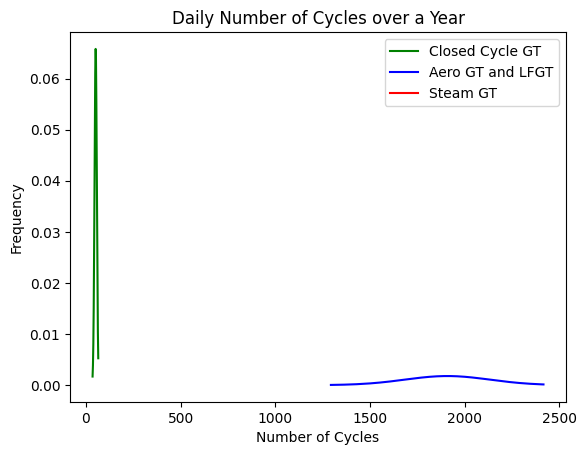

In [55]:
mean = statistics.mean(np.sort(ciclos))
sd = statistics.stdev(np.sort(ciclos))
plt.plot(np.sort(ciclos),norm.pdf(np.sort(ciclos),mean,sd), color="g", label="Closed Cycle GT")
mean = statistics.mean(np.sort(ciclos_menores))
sd = statistics.stdev(np.sort(ciclos_menores))
plt.plot(np.sort(ciclos_menores),norm.pdf(np.sort(ciclos_menores),mean,sd), color="b", label="Aero GT and LFGT")
mean = statistics.mean(np.sort(ciclos_steam))
sd = statistics.stdev(np.sort(ciclos_steam))
plt.plot(np.sort(ciclos_steam),norm.pdf(np.sort(ciclos_steam),mean,sd), color="r", label="Steam GT")
plt.legend(loc="upper right")
plt.title("Daily Number of Cycles over a Year")
plt.ylabel("Frequency")
plt.xlabel("Number of Cycles")
plt.show()

In [56]:
media_day_cycles=np.ceil(np.average(ciclos))
print("numero médio de ciclos em um dia =",media_day_cycles)

numero médio de ciclos em um dia = 52.0


In [57]:
media_day_cycles_menores=np.ceil(np.average(ciclos_menores))
print("numero médio de ciclos em um dia =",media_day_cycles_menores)

numero médio de ciclos em um dia = 1909.0


## subseção - impacto no custo

In [58]:
print(df2)


                     1          2          3           4               5  \
0                  NaN       CCGT   Gas Aero   Gas Steam  Large Frame GT   
1           cycle cost         55         24          58             126   
2          other costs          0        1.9        3.99            0.95   
3            fuel cost        0.2       1.53        6.99            0.19   
4      fuel energy(NG)      47130      47130       47130           47130   
5       fuel price(NG)      0.213      0.213       0.213           0.213   
6     energy price(NG)   0.000005   0.000005    0.000005        0.000005   
7     energy price(NG)   4.768235   4.768235    4.768235        4.768235   
8            Total(NG)  55.953647  33.195399    95.31996      127.855965   
9       fuel energy(H)     119986     119986      119986          119986   
10       fuel price(H)       2.69       2.69        2.69            2.69   
11     energy price(H)   0.000022   0.000022    0.000022        0.000022   
12     energ

In [59]:
Variable_cost_CCGT=df2.loc[15,2]
Variable_cost_AGT=df2.loc[15,3]
Variable_cost_SGT=df2.loc[15,4]
Variable_cost_LFGT=df2.loc[15,5]

In [60]:
total_natural_gas_CCGT=df2.loc[8,2]*media_day_cycles*potencia_termo
print("Total cost of a CCGT cycle on NG:",total_natural_gas_CCGT)

total_hydrogen_gas_CCGT=df2.loc[13,2]*media_day_cycles*potencia_termo
print("Total cost of a CCGT cycle on H:",total_hydrogen_gas_CCGT)

impact_over_time_ng_CCGT=[]
for i in range(1,10):
  impact_over_time_ng_CCGT.append(((df2.loc[8,2]*potencia_termo)/(potencia_termo*i)))

impact_over_time_h_CCGT=[]
for i in range(1,10):
  impact_over_time_h_CCGT.append(((df2.loc[13,2]*potencia_termo)/(potencia_termo*i)))

grafico_interativo_linha(list(range(10)),
                         impact_over_time_ng_CCGT,
                         "Time[Hours]",
                         "Impacto no preço da energia NG [$/MWh]",
                         "Increase on cost over working hours CCGT on NG")

grafico_interativo_linha(list(range(10)),
                         impact_over_time_h_CCGT,
                         "Time[Hours]",
                         "Impacto no preço da energia H [$/MWh]",
                         "Increase on cost over working hours CCGT on H")

# plt.plot(range(1,10),impact_over_time_ng_CCGT)
# plt.title("Increase on cost over working hours CCGT on NG")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia NG [$/MWh]")
# plt.show()

# plt.plot(range(1,10),impact_over_time_h_CCGT)
# plt.title("Increase on cost over working hours CCGT on H")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia H [$/MWh]")
# plt.show()

Total cost of a CCGT cycle on NG: 1309315.337928
Total cost of a CCGT cycle on H: 1397698.824366


In [61]:
total_natural_gas_AGT=df2.loc[8,3]*media_day_cycles_menores*potencia_termo_menores
print("Total cost of a Aero GT cycle on NG:",total_natural_gas_AGT)

total_hydrogen_gas_AGT=df2.loc[13,3]*media_day_cycles_menores*potencia_termo_menores
print("Total cost of a Aero GT cycle on H:",total_hydrogen_gas_AGT)

impact_over_time_ng_AGT=[]
for i in range(1,10):
  impact_over_time_ng_AGT.append(((df2.loc[8,3]*potencia_termo_menores)/(potencia_termo_menores*i)))

impact_over_time_h_AGT=[]
for i in range(1,10):
  impact_over_time_h_AGT.append(((df2.loc[13,3]*potencia_termo_menores)/(potencia_termo_menores*i)))


grafico_interativo_linha(list(range(10)),
                         impact_over_time_ng_AGT,
                         "Time[Hours]",
                         "Impacto no preço da energia NG [$/MWh]",
                         "Increase on cost over working hours Aero GT on NG",
                         "Legenda de teste")

grafico_interativo_linha(list(range(10)),
                         impact_over_time_h_AGT,
                         "Time[Hours]",
                         "Impacto no preço da energia H [$/MWh]",
                         "Increase on cost over working hours Aero GT on H")


# plt.plot(range(1,10),impact_over_time_ng_AGT,color="b",label="teste 1")
# plt.legend(loc="upper right")
# plt.title("Increase on cost over working hours Aero GT on NG")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia NG [$/MWh]")
# plt.show()

# plt.plot(range(1,10),impact_over_time_h_AGT)
# plt.title("Increase on cost over working hours Aero GT on H")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia H [$/MWh]")
# plt.show()


Total cost of a Aero GT cycle on NG: 760440.19891752
Total cost of a Aero GT cycle on H: 1422357.72618516


In [62]:
total_natural_gas_SGT=df2.loc[8,4]*media_day_cycles*potencia_termo
print("Total cost of a Steam GT cycle on NG:",total_natural_gas_SGT)

total_hydrogen_gas_SGT=df2.loc[13,4]*media_day_cycles*potencia_termo
print("Total cost of a Steam GT cycle on H:",total_hydrogen_gas_SGT)

impact_over_time_ng_SGT=[]
for i in range(1,10):
  impact_over_time_ng_SGT.append(((df2.loc[8,4]*potencia_termo)/(potencia_termo*i)))

impact_over_time_h_SGT=[]
for i in range(1,10):
  impact_over_time_h_SGT.append(((df2.loc[13,4]*potencia_termo)/(potencia_termo*i)))


grafico_interativo_linha(list(range(10)),
                         impact_over_time_ng_SGT,
                         "Time[Hours]",
                         "Impacto no preço da energia NG [$/MWh]",
                         "Increase on cost over working hours Steam GT on NG")

grafico_interativo_linha(list(range(10)),
                        impact_over_time_h_SGT,
                        "Time[Hours]",
                        "Impacto no preço da energia NG [$/MWh]",
                        "Increase on cost over working hours Steam GT on NG")

# plt.plot(range(1,10),impact_over_time_ng_SGT)
# plt.title("Increase on cost over working hours Steam GT on NG")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia NG [$/MWh]")
# plt.show()

# plt.plot(range(1,10),impact_over_time_h_SGT)
# plt.title("Increase on cost over working hours Steam GT on H")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia H [$/MWh]")
# plt.show()

Total cost of a Steam GT cycle on NG: 2230487.060256
Total cost of a Steam GT cycle on H: 5319489.91158


In [63]:
total_natural_gas_LFGT=df2.loc[8,5]*media_day_cycles_menores*potencia_termo_menores
print("Total cost of a Large frame GT cycle on NG:",total_natural_gas_LFGT)

total_hydrogen_gas_LFGT=df2.loc[13,5]*media_day_cycles*potencia_termo_menores
print("Total cost of a Large frame GT cycle on H:",total_hydrogen_gas_LFGT)

impact_over_time_ng_LFGT=[]
for i in range(1,10):
  impact_over_time_ng_LFGT.append(((df2.loc[8,5]*potencia_termo_menores)/(potencia_termo_menores*i)))

impact_over_time_h_LFGT=[]
for i in range(1,10):
  impact_over_time_h_LFGT.append(((df2.loc[13,5]*potencia_termo_menores)/(potencia_termo_menores*i)))


grafico_interativo_linha(list(range(10)),
                         impact_over_time_ng_LFGT,
                         "Time[Hours]",
                         "Impacto no preço da energia NG[$/MWh]",
                         "Increase on cost over working hours Large frame GT on NG")

grafico_interativo_linha(list(range(10)),
                         impact_over_time_ng_LFGT,
                         "Time[Hours]",
                         "Impacto no preço da energia NG[$/MWh]",
                         "Increase on cost over working hours Large frame GT on NG")

# plt.plot(range(1,10),impact_over_time_ng_LFGT)
# plt.title("Increase on cost over working hours Large frame GT on NG")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Impacto no preço da energia NG[$/MWh]")
# plt.show()

# plt.plot(range(1,10),impact_over_time_h_LFGT)
# plt.title("Cost Decrease over wWrking hours Large frame GT on H")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Energy Price Impact H [$/MWh]")
# plt.show()


Total cost of a Large frame GT cycle on NG: 2928924.4370568
Total cost of a Large frame GT cycle on H: 82021.170192


In [64]:
lines_plot = [impact_over_time_ng_AGT,
              impact_over_time_ng_CCGT,
              impact_over_time_ng_SGT,
              impact_over_time_ng_LFGT]

line_names = ["Aero GT","Closed Cycle GT", "Steam Gt", "Large Frame GT"]

grafico_interativo_multiplas_linhas(list(range(10)),
                                    lines_plot,
                                    "Time [Hours]",
                                    "Energy Price Impact [$/MWh]",
                                    "Cost Reduction over Working Hours Using NG",
                                    line_names)

# plt.plot(range(1,10),impact_over_time_ng_AGT,color="b",label="Aero GT")
# plt.plot(range(1,10),impact_over_time_ng_CCGT,color="g",label="Closed Cycle GT")
# plt.plot(range(1,10),impact_over_time_ng_SGT,color="r",label="Steam Gt")
# plt.plot(range(1,10),impact_over_time_ng_LFGT,color="magenta",label="Large Frame GT")
# plt.legend(loc="upper right")

# plt.title("Cost Reduction over Working Hours Using NG")
# plt.xlabel("Time [Hours]")
# plt.ylabel("Energy Price Impact [$/MWh]")
# plt.show()

In [65]:
lines_plot = [impact_over_time_h_AGT,
              impact_over_time_h_CCGT,
              impact_over_time_h_SGT,
              impact_over_time_h_LFGT]

line_names = ["Aero GT","Closed Cycle GT", "Steam Gt", "Large Frame GT"]

grafico_interativo_multiplas_linhas(list(range(10)),
                                    lines_plot,
                                    "Time [Hours]",
                                    "Energy Price Impact [$/MWh]",
                                    "Cost Reduction over Working Hours Using H",
                                    line_names)

# plt.plot(range(1,10),impact_over_time_h_AGT,color="b",label="Aero GT")
# plt.plot(range(1,10),impact_over_time_h_CCGT,color="g",label="Closed Cycle GT")
# plt.plot(range(1,10),impact_over_time_h_SGT,color="r",label="Steam Gt")
# plt.plot(range(1,10),impact_over_time_h_LFGT,color="magenta",label="Large Frame GT")
# plt.legend(loc="upper right")

# plt.title("Cost Reduction over Working Hours Using H")
# plt.xlabel("Time [Hours]")
# plt.ylabel("Energy Price Impact [$/MWh]")
# plt.show()

In [66]:
lines_plot = [impact_over_time_ng_CCGT, impact_over_time_ng_AGT]

line_names = ["Closed Cycle GT", "Aero GT"]

grafico_interativo_multiplas_linhas(list(range(10)),
                                    lines_plot,
                                    "Time[Hours]",
                                    "Energy Price Impact [$/MWh]",
                                    "Increase in Cost over Working Hours Using NG",
                                    line_names)

# plt.plot(range(1,10),impact_over_time_ng_CCGT,color="g",label="Closed Cycle GT")
# plt.plot(range(1,10),impact_over_time_ng_AGT,color="b",label="Aero GT")

# plt.legend(loc="upper right")

# plt.title("Increase in Cost over Working Hours Using NG")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Energy Price Impact [$/MWh]")
# plt.show()

In [67]:
lines_plot = [impact_over_time_h_CCGT, impact_over_time_h_AGT]

line_names = ["Closed Cycle GT", "Aero GT"]

grafico_interativo_multiplas_linhas(list(range(10)),
                                    lines_plot,
                                    "Time[Hours]",
                                    "Energy Price Impact [$/MWh]",
                                    "Increase in Cost over Working Hours Using H",
                                    line_names)


# plt.plot(range(1,10),impact_over_time_h_CCGT,color="g",label="Closed Cycle GT")
# plt.plot(range(1,10),impact_over_time_h_AGT,color="b",label="Aero GT")

# plt.legend(loc="upper right")

# plt.title("Increase in Cost over Working Hours Using H")
# plt.xlabel("Time[Hours]")
# plt.ylabel("Energy Price Impact [$/MWh]")
# plt.show()

In [68]:
mean = statistics.mean(np.sort(amplitudes))
sd = statistics.stdev(np.sort(amplitudes))

x_axis = np.sort(amplitudes)
y_axis = norm.pdf(np.sort(amplitudes),mean,sd)

grafico_interativo_linha( x_axis,
                          y_axis,
                         "Amplitude",
                         "Frequency",
                         "Daily Amplitude over a Year")

# plt.plot(np.sort(amplitudes),norm.pdf(np.sort(amplitudes),mean,sd))
# plt.title("Daily Amplitude over a Year")
# plt.ylabel("Frequency")
# plt.xlabel("Amplitude")
# plt.show()

In [69]:
custo_mw_flexivel_ccgt_NG=((total_natural_gas_CCGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_CCGT*MWH_flexivel)
print("Custo CCGT (NG) do MW Flexível = ", custo_mw_flexivel_ccgt_NG)
custo_mw_flexivel_ccgt_H=((total_hydrogen_gas_CCGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_CCGT*MWH_flexivel)
print("Custo CCGT (H) do MW Flexível = ", custo_mw_flexivel_ccgt_H)
custo_mw_flexivel_agt_NG=((total_natural_gas_AGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_AGT*MWH_flexivel)
print("Custo Aero GT (NG) do MW Flexível = ",custo_mw_flexivel_agt_NG)
custo_mw_flexivel_agt_H=((total_hydrogen_gas_AGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_AGT*MWH_flexivel)
print("Custo Aero GT (H) do MW Flexível = ",custo_mw_flexivel_agt_H)
custo_mw_flexivel_sgt_NG=((total_natural_gas_SGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_SGT*MWH_flexivel)
print("Custo Steam GT (NG) do MW Flexível = ", custo_mw_flexivel_sgt_NG)
custo_mw_flexivel_sgt_H=((total_hydrogen_gas_SGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_SGT*MWH_flexivel)
print("Custo Steam GT (H) do MW Flexível = ", custo_mw_flexivel_sgt_H)
custo_mw_flexivel_lfgt_NG=((total_natural_gas_LFGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_LFGT*MWH_flexivel)
print("Custo LFGT (NG) do MW Flexível = ", custo_mw_flexivel_lfgt_NG)
custo_mw_flexivel_lfgt_H=((total_hydrogen_gas_LFGT*media_day_cycles)/MWH_flexivel)+(Variable_cost_LFGT*MWH_flexivel)
print("Custo LFGT (H) do MW Flexível = ",custo_mw_flexivel_lfgt_H)

Custo CCGT (NG) do MW Flexível =  210494.15222294343
Custo CCGT (H) do MW Flexível =  210516.4579770022
Custo Aero GT (NG) do MW Flexível =  136180.20150006496
Custo Aero GT (H) do MW Flexível =  136347.25272383378
Custo Steam GT (NG) do MW Flexível =  190122.34693675127
Custo Steam GT (H) do MW Flexível =  190901.93304118508
Custo LFGT (NG) do MW Flexível =  118183.61488066263
Custo LFGT (H) do MW Flexível =  117465.12858125253


In [70]:

final_cost_time = []
for i in range(10):
  final_cost = impact_over_time_ng_CCGT[i] +
  final_cost_time.append(final_cost)

plt.plot(range(1,10),impact_over_time_ng_CCGT,color="g",label="Closed Cycle GT")

SyntaxError: invalid syntax (3181675970.py, line 3)

#notas

TEM QUE ADICIONAR NOISE NO DATASET DE VARIAÇÃO HORÁRIA (base the noise in energias não despachaveis)